In [1]:
# import data processing and visualisation libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import cv2
import skimage
from skimage.transform import resize
from skimage import io
from skimage import exposure

import tensorflow as tf
from tensorflow import keras
import os

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Flatten
from tensorflow.keras import datasets, layers, models

import gc

2024-04-15 20:57:41.689285: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-15 20:57:43.533168: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# import cv2
# import mediapipe as mp
# import matplotlib.pyplot as plt

# # Initialize mediapipe hand solution
# mp_hands = mp.solutions.hands
# hands = mp_hands.Hands()

# # Initialize mediapipe drawing utility
# mp_drawing = mp.solutions.drawing_utils

# # Read image
# image = cv2.imread('A1.jpg')

# # Convert the BGR image to RGB
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# # Process the image to extract hand landmarks
# results = hands.process(image)

# # If hand landmarks were detected
# if results.multi_hand_landmarks:
#     for hand_landmarks in results.multi_hand_landmarks:
#         # Draw hand landmarks on the image
#         mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

# # Convert the RGB image to BGR
# image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# # Display the image
# plt.imshow(image)
# plt.axis('off')  # To hide axis values
# plt.show()

# # Close mediapipe hand solution
# hands.close()

In [3]:
import mediapipe as mp
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

mp_drawing = mp.solutions.drawing_utils


I0000 00:00:1713229071.999113 2528067 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1713229072.005737 2528495 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics 620 (KBL GT2)


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [4]:
parent_dir = "landmarks_dataset"
os.makedirs(parent_dir, exist_ok=True)

In [5]:
batch_size = 64
imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 26

def get_data(folder, max_images_per_class=1000):
    X = []
    y = []
    labels = {}
    label_index = 0
    for folderName in sorted(os.listdir(folder)):
        if not folderName.startswith('.'):
            labels[folderName] = label_index
            image_count = 0
            for image_filename in os.listdir(os.path.join(folder, folderName)):
                if image_count >= max_images_per_class:
                    break
                img_file = cv2.imread(os.path.join(folder, folderName, image_filename))
                if img_file is not None:
                    img_file = cv2.cvtColor(img_file, cv2.COLOR_BGR2RGB)
                    # img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    # img_file = skimage.color.rgb2gray(img_file)
                    # img_file = img_file / 255.0
                    # img_file = exposure.equalize_hist(img_file)
                    X.append(img_file)
                    y.append(label_index)
                    image_count += 1
            label_index += 1
    return np.array(X), np.array(y)

train_dir = "./asl_alphabet_test/"
X_train, y_train = get_data(train_dir, 1000)

print("Images successfully imported...")

Images successfully imported...


In [6]:
print("the Shape of x train is : ", X_train.shape)
print("the Shape of y train is : ", y_train.shape)

the Shape of x train is :  (26000, 200, 200, 3)
the Shape of y train is :  (26000,)


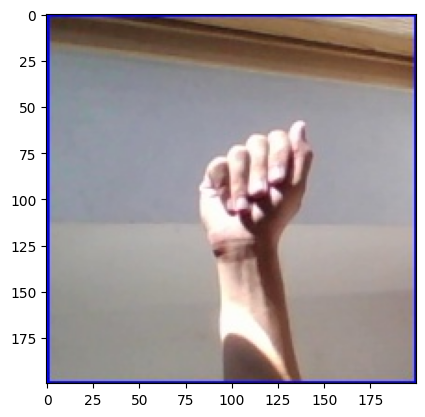

In [7]:
plt.imshow(X_train[0])
plt.show()

In [8]:
def get_letter_from_index(index):
    return chr(index + 65)

In [9]:
for letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
    os.makedirs(f'landmarks_dataset/{letter}', exist_ok=True)
    
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

mp_drawing = mp.solutions.drawing_utils
    
for i, image_ in enumerate(X_train):
    image = cv2.cvtColor(image_.astype(np.float32), cv2.COLOR_BGR2RGB)
    image = image.astype(np.uint8)
    
    results = hands.process(image)
    
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            letter = chr((i // 1000) + ord('A'))
            image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            cv2.imwrite(f'landmarks_dataset/{letter}/{i % 1000}.jpg', image_bgr)

hands.close()

I0000 00:00:1713229210.399947 2528067 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1713229210.404852 2529286 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics 620 (KBL GT2)
